In [326]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from notebook.services.config import ConfigManager
c = ConfigManager()
c.update('notebook', {"CodeCell": {"cm_config": {"autoCloseBrackets": False}}})

{'CodeCell': {'cm_config': {'autoCloseBrackets': False}}}

## King County Housing EDA
I begin by cleaning the dataset and poking around

In [327]:
data = pd.read_csv('kc_house_data.csv')
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


When I think of an assessor, I think of the phrase "price per square foot". I wondered how that relationship might look.

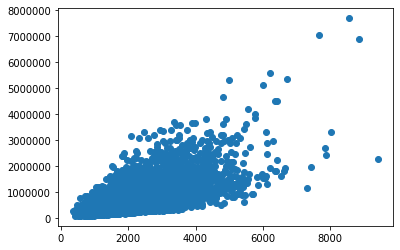

In [328]:
plt.scatter(data['sqft_above'],data['price'])

In [329]:
new_frame = data[['price','sqft_living','sqft_lot']]
new_frame['ppsqft'] = data['price']/(data['sqft_above'])
new_frame.head()

C:\Users\root\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,price,sqft_living,sqft_lot,ppsqft
0,221900.0,1180,5650,188.050847
1,538000.0,2570,7242,247.926267
2,180000.0,770,10000,233.766234
3,604000.0,1960,5000,575.238095
4,510000.0,1680,8080,303.571429


Now I handle NaNs and placeholder values

In [330]:
len_before = len(data)
print("Dataset size: {}".format(len_before))
display(data.describe())
print("NaN info:")
print(data.isna().sum())

Dataset size: 21597


,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


NaN info:
id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64


Explicit NaNs:  
- waterfront  
- yr_renovated  
- view  

Waterfront NaNs: 2376


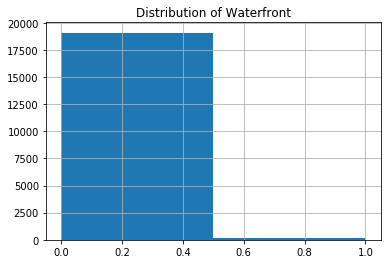

In [331]:
print('Waterfront NaNs: {}'.format(data['waterfront'].isna().sum()))
data['waterfront'].hist(bins=2).set_title('Distribution of Waterfront');

In [332]:
# just going to set them to 0 (not waterfront), since that's definitely most probable.
data['waterfront'].fillna(0, inplace=True)

#### Handling `yr_renovated` NaNs

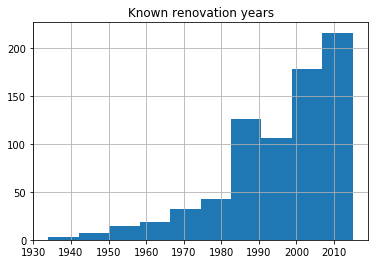

In [333]:
data['yr_renovated'].fillna(0, inplace=True)
data['yr_renovated'] = data['yr_renovated'].astype(int)
data[data['yr_renovated'] > 0]['yr_renovated'].hist().set_title('Known renovation years');

#### Handling `view` NaNs

View NaNs: 63


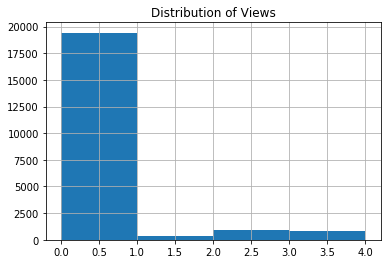

In [334]:
print('View NaNs: {}'.format(data['view'].isna().sum()))
data['view'].hist(bins=4).set_title('Distribution of Views');

In [335]:
# Placeholder '?' in sqft_basement
# zipcode needs to be int

In [336]:
print("Placeholders in `sqft_basement`: {}".format(len(data[data['sqft_basement'] == '?'])))
data.loc[data['sqft_basement'] == '?','sqft_basement'] = 0.

Placeholders in `sqft_basement`: 454


In [337]:
data.dropna(inplace=True)
data['zipcode'] = data['zipcode'].astype(int)
data['waterfront'] = data['waterfront'].astype(int)
data['view'] = data['view'].astype(int)

Let's see how much data we've lost in the cleaning.

In [338]:
print('Dataset Size\nBefore: {}\t After: {}\t Difference: {}'.format(
    len_before, len(data), (len_before - len(data))))

Dataset Size
Before: 21597	 After: 21534	 Difference: 63


### Bin some stuff

In [339]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0.0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400.0,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0.0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910.0,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0.0,1987,0,98074,47.6168,-122.045,1800,7503


In [340]:
data['grade'] = data['grade'].astype('category')

In [341]:
# just curious about average sales over time
#data['date'].dtype
#import matplotlib
#dates = matplotlib.dates.datestr2num(data['date'].to_numpy()) 

In [342]:
#data['date'] = pd.to_datetime(data['date'],infer_datetime_format=False)

In [343]:
'''
monthly_counts = data.groupby(data['date'].dt.strftime('%y/%m'))['price'].count().to_frame().reset_index()
monthly_counts['date'] = monthly_counts['date'].apply(lambda x: datetime.strptime(x,'%y/%m'))
plt.plot(monthly_counts['date'],monthly_counts['price'])
'''

"\nmonthly_counts = data.groupby(data['date'].dt.strftime('%y/%m'))['price'].count().to_frame().reset_index()\nmonthly_counts['date'] = monthly_counts['date'].apply(lambda x: datetime.strptime(x,'%y/%m'))\nplt.plot(monthly_counts['date'],monthly_counts['price'])\n"

In [344]:
'''
from datetime import datetime
monthly_means = data.groupby(data['date'].dt.strftime('%y/%m'))['price'].mean().to_frame().reset_index()
monthly_means['date'] = monthly_means['date'].apply(lambda x: datetime.strptime(x,'%y/%m'))
plt.plot(monthly_means['date'],monthly_means['price'])

monthly_medians = data.groupby(data['date'].dt.strftime('%y/%m'))['price'].median().to_frame().reset_index()
monthly_medians['date'] = monthly_medians['date'].apply(lambda x: datetime.strptime(x,'%y/%m'))
plt.plot(monthly_medians['date'],monthly_medians['price'])
plt.legend(["mean","median"])
'''

'\nfrom datetime import datetime\nmonthly_means = data.groupby(data[\'date\'].dt.strftime(\'%y/%m\'))[\'price\'].mean().to_frame().reset_index()\nmonthly_means[\'date\'] = monthly_means[\'date\'].apply(lambda x: datetime.strptime(x,\'%y/%m\'))\nplt.plot(monthly_means[\'date\'],monthly_means[\'price\'])\n\nmonthly_medians = data.groupby(data[\'date\'].dt.strftime(\'%y/%m\'))[\'price\'].median().to_frame().reset_index()\nmonthly_medians[\'date\'] = monthly_medians[\'date\'].apply(lambda x: datetime.strptime(x,\'%y/%m\'))\nplt.plot(monthly_medians[\'date\'],monthly_medians[\'price\'])\nplt.legend(["mean","median"])\n'

In [345]:
def quick_dummies(df,column,drop_first=True):
    ''' Converts a dataframe column to dummies
    
    Parameters:
    df (pd.DataFrame): the dataframe in question
    column (str): the column name for conversion
    drop_first (bool): whether to drop dummy column with fewest positives
    
    Returns:
    pd.DataFrame: the modified copy of the dataframe
    
    '''
    dfc = df.copy()
    dummies = pd.get_dummies(dfc[column],prefix=column,drop_first=drop_first)
    dfc.drop(column,axis=1,inplace=True)
    dfc = pd.concat([dfc,dummies],axis=1)
    return dfc

data.drop('zipcode',axis=1,inplace=True)
data.drop('yr_built',axis=1,inplace=True)
data.drop('yr_renovated',axis=1,inplace=True)

to_dummies = ['condition','view','floors','bathrooms','bedrooms','grade']
for col in to_dummies:
    data = quick_dummies(data,col)
display(data.head())
data.columns



,id,date,price,sqft_living,sqft_lot,waterfront,sqft_above,sqft_basement,lat,long,...,grade_4,grade_5,grade_6,grade_7,grade_8,grade_9,grade_10,grade_11,grade_12,grade_13
0,7129300520,10/13/2014,221900.0,1180,5650,0,1180,0.0,47.5112,-122.257,...,0,0,0,1,0,0,0,0,0,0
1,6414100192,12/9/2014,538000.0,2570,7242,0,2170,400.0,47.7210,-122.319,...,0,0,0,1,0,0,0,0,0,0
2,5631500400,2/25/2015,180000.0,770,10000,0,770,0.0,47.7379,-122.233,...,0,0,1,0,0,0,0,0,0,0
3,2487200875,12/9/2014,604000.0,1960,5000,0,1050,910.0,47.5208,-122.393,...,0,0,0,1,0,0,0,0,0,0
4,1954400510,2/18/2015,510000.0,1680,8080,0,1680,0.0,47.6168,-122.045,...,0,0,0,0,1,0,0,0,0,0


Index(['id', 'date', 'price', 'sqft_living', 'sqft_lot', 'waterfront',
       'sqft_above', 'sqft_basement', 'lat', 'long', 'sqft_living15',
       'sqft_lot15', 'condition_2', 'condition_3', 'condition_4',
       'condition_5', 'view_1', 'view_2', 'view_3', 'view_4', 'floors_1.5',
       'floors_2.0', 'floors_2.5', 'floors_3.0', 'floors_3.5',
       'bathrooms_0.75', 'bathrooms_1.0', 'bathrooms_1.25', 'bathrooms_1.5',
       'bathrooms_1.75', 'bathrooms_2.0', 'bathrooms_2.25', 'bathrooms_2.5',
       'bathrooms_2.75', 'bathrooms_3.0', 'bathrooms_3.25', 'bathrooms_3.5',
       'bathrooms_3.75', 'bathrooms_4.0', 'bathrooms_4.25', 'bathrooms_4.5',
       'bathrooms_4.75', 'bathrooms_5.0', 'bathrooms_5.25', 'bathrooms_5.5',
       'bathrooms_5.75', 'bathrooms_6.0', 'bathrooms_6.25', 'bathrooms_6.5',
       'bathrooms_6.75', 'bathrooms_7.5', 'bathrooms_7.75', 'bathrooms_8.0',
       'bedrooms_2', 'bedrooms_3', 'bedrooms_4', 'bedrooms_5', 'bedrooms_6',
       'bedrooms_7', 'bedrooms_8', 'be

### Cutting
I'm pretty sure I'd like to cut some of these continuous columns into categorical bins. Before I do, though, I want to see what the distributions look like.

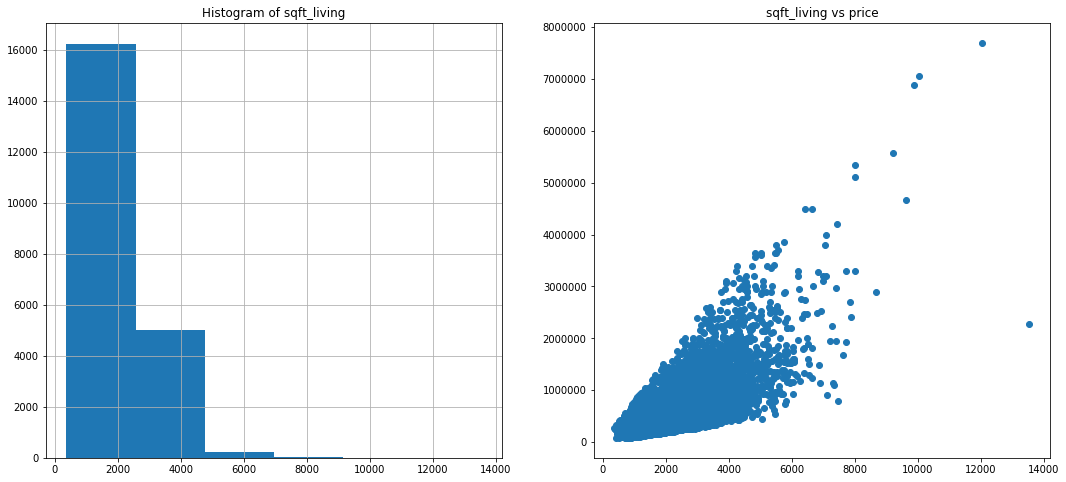

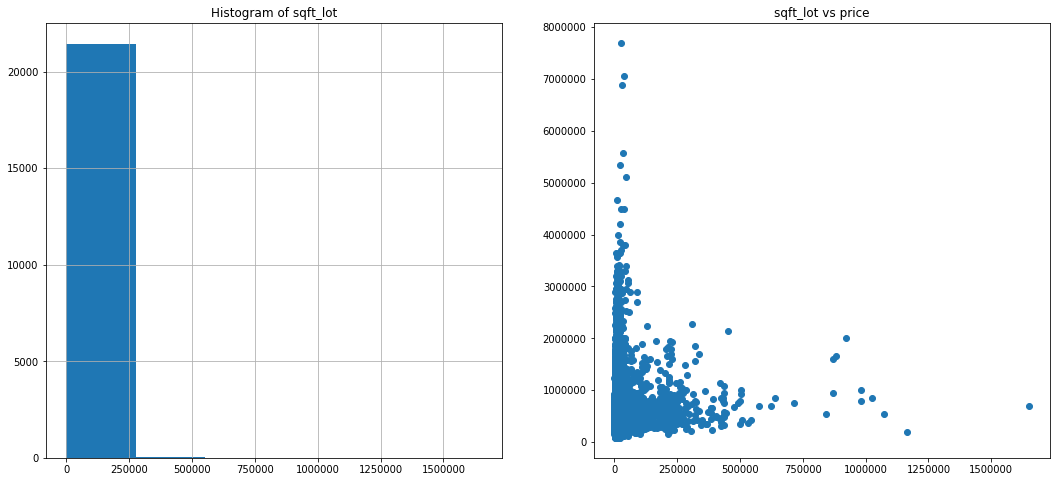

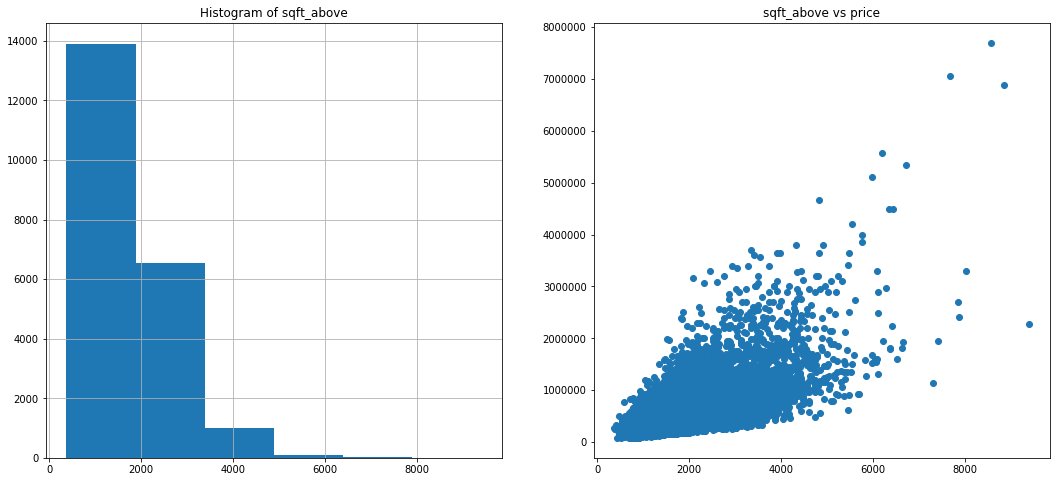

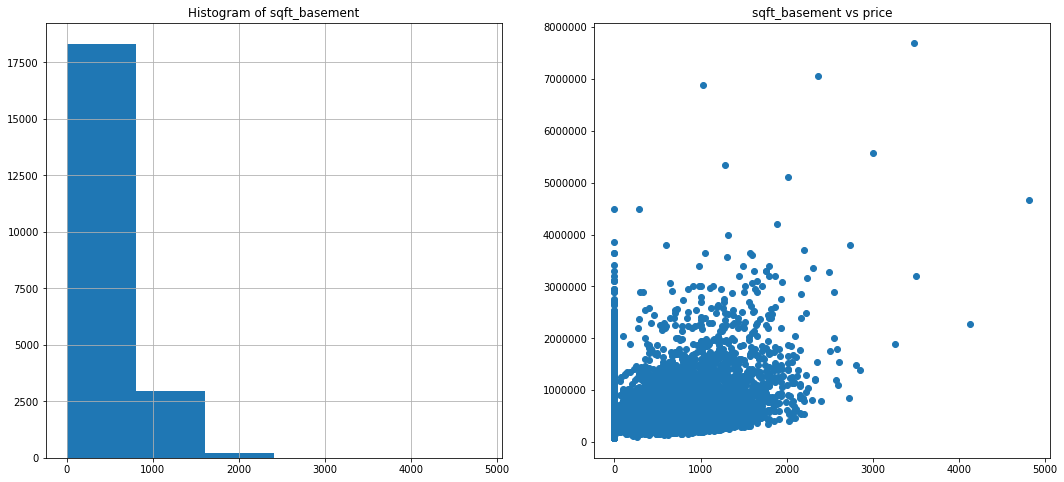

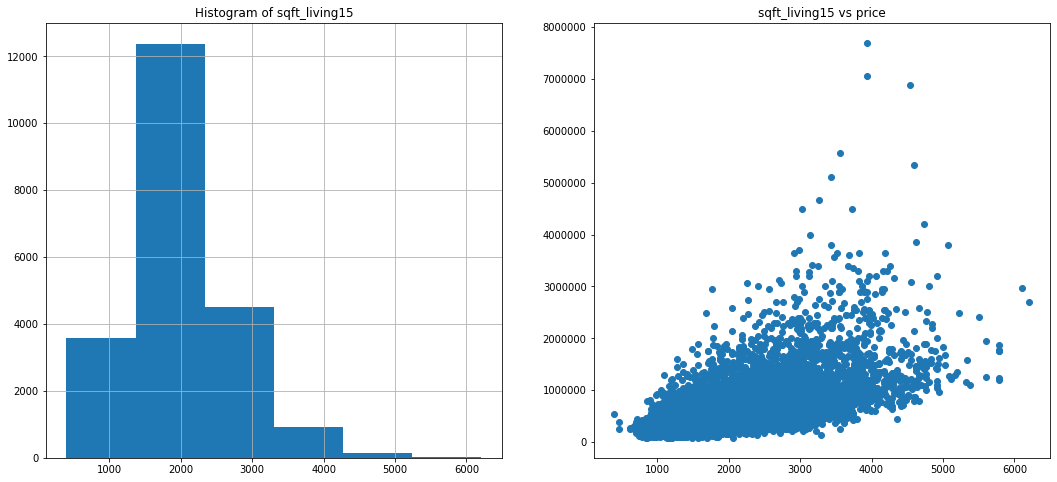

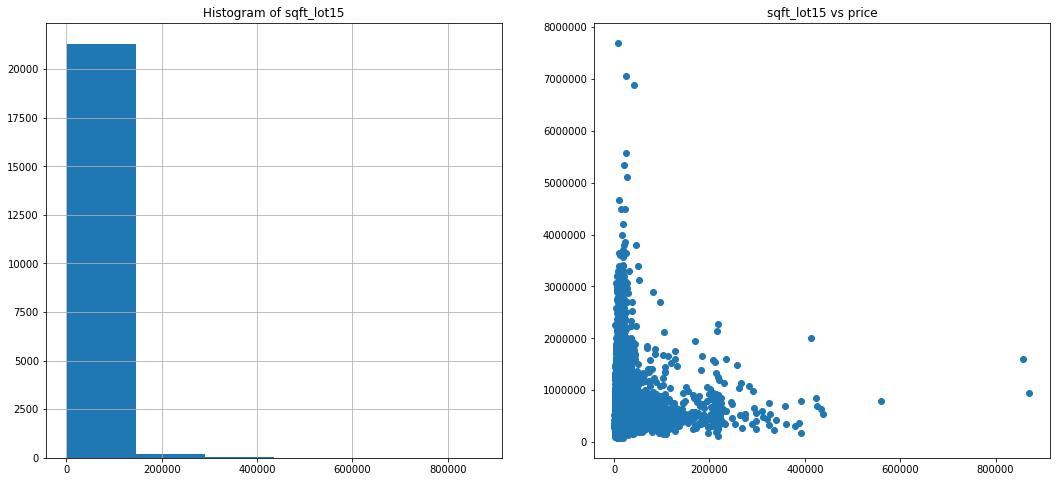

In [346]:
to_cut = ['sqft_living','sqft_lot','sqft_above','sqft_basement','sqft_living15','sqft_lot15']
data['sqft_basement'] = data['sqft_basement'].astype(float)

for col in to_cut:
    plt.figure(figsize=(18,8))
    plt.subplot(1,2,1)
    data[col].hist(bins=6)
    plt.title('Histogram of {}'.format(col))
    plt.subplot(1,2,2)
    plt.scatter(data[col],data['price'])
    plt.title('{} vs price'.format(col));

In [347]:
def quick_cut(df,column,q=6,drop_first=True):
    ''' Converts a continuous dataframe column to quantile-binned dummies
    
    Parameters:
    df (pd.DataFrame): the dataframe in question
    column (str): the column name for conversion
    q (int): quantiles at which to slice
    drop_first (bool): whether to drop dummy column with fewest positives
    
    Returns:
    pd.DataFrame: the modified copy of the dataframe
    
    '''
    dfc = df.copy()
    temp = pd.qcut(dfc[column],q,duplicates='drop')
    temp = pd.get_dummies(temp,prefix=column,drop_first=drop_first)
    dfc.drop(column,axis=1,inplace=True)
    dfc = pd.concat([dfc,temp],axis=1)
    return dfc

for col in to_cut:
    data[col] = quick_cut(data,col)

It seems to me that the neighborhood of residence is probably pretty relevant. I've heard of "grouping" techniques, but I don't think I've learned any yet, so I'm just going to use a dataset I found [online](https://gis-kingcounty.opendata.arcgis.com/datasets/neighborhood-centers-in-king-county-neighborhood-centers-point/data?page=5) to figure out what neighborhood each datapoint lies in, an how far they are from from their nearest CBD.

In [348]:
from operator import itemgetter
from haversine import haversine

hoods = pd.read_csv('Neighborhood_Centers_in_King_County__neighborhood_centers_point.csv')

def find_cbd(df,hoods):
    ''' Finds nearest hoods
    
    Parameters:
    df (pd.DataFrame): dataframe containing columns 'lat' and 'long'
    hoods (pd.DataFrame): dataframe containing hoods dataset
    
    Returns:
    pd.DataFrame: dataframe containing hoods and distances thereto
    '''
    nearest_hoods,dist_hoods = [],[]
    for row in df.iterrows():
        lat = row[1]['lat']
        lon = row[1]['long']
        to_cbd = []
        for hood in hoods.iterrows():
            dist = haversine((lat,lon), (hood[1]['LATITUDE'],hood[1]['LONGITUDE']), unit='mi')
            to_cbd.append({'CBD' : hood[1]['NAME'],
                           'DIST' : dist})
        sortd = sorted(to_cbd, key=itemgetter('DIST'))
        nearest_hoods.append(sortd[0]['CBD'])
        dist_hoods.append(sortd[0]['DIST'])
    new_panda = pd.DataFrame()
    new_panda['nearest_hoods'] = nearest_hoods
    new_panda['dist_hoods'] = dist_hoods
    return new_panda
        
#found = find_cbd(data,hoods)
#found.to_csv('hoods_data.csv',index=False) # because finding the hoods takes a little while
found = pd.read_csv('hoods_data.csv')

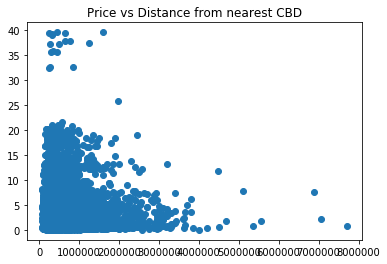

In [349]:
data = pd.concat([data,found],join='inner',axis=1)
plt.scatter(data['price'],data['dist_hoods'])
plt.title("Price vs Distance from nearest CBD");

In [350]:
data['nearest_hoods'] = data['nearest_hoods'].astype('category')
data['nearest_hood'] = data['nearest_hoods'].cat.codes
data.drop('nearest_hoods',axis=1,inplace=True)
data.head()

,id,date,price,sqft_living,sqft_lot,waterfront,sqft_above,sqft_basement,lat,long,...,grade_6,grade_7,grade_8,grade_9,grade_10,grade_11,grade_12,grade_13,dist_hoods,nearest_hood
0,7129300520,10/13/2014,221900.0,7129300520,7129300520,0,7129300520,7129300520,47.5112,-122.257,...,0,1,0,0,0,0,0,0,1.032990,32
1,6414100192,12/9/2014,538000.0,6414100192,6414100192,0,6414100192,6414100192,47.7210,-122.319,...,0,1,0,0,0,0,0,0,0.879959,30
2,5631500400,2/25/2015,180000.0,5631500400,5631500400,0,5631500400,5631500400,47.7379,-122.233,...,1,0,0,0,0,0,0,0,0.741188,13
3,2487200875,12/9/2014,604000.0,2487200875,2487200875,0,2487200875,2487200875,47.5208,-122.393,...,0,1,0,0,0,0,0,0,1.684835,25
4,1954400510,2/18/2015,510000.0,1954400510,1954400510,0,1954400510,1954400510,47.6168,-122.045,...,0,0,1,0,0,0,0,0,5.275227,11


In [351]:
X = data
y = X.pop('price')
# don't need these columns for regression
X.drop('date',axis=1,inplace=True)
X.drop('lat',axis=1,inplace=True)
X.drop('long',axis=1,inplace=True)
X.drop('id',axis=1,inplace=True)

In [352]:
from sklearn.preprocessing import MinMaxScaler
X_scaler = MinMaxScaler()
y_scaler = MinMaxScaler()

X_scaled = X_scaler.fit_transform(X)
y_scaled = y_scaler.fit_transform(y.ravel().reshape(-1,1))

from sklearn.model_selection import train_test_split as tts
X_train,X_test,y_train,y_test = tts(X_scaled,y_scaled,test_size=0.1)

In [363]:
from sklearn.ensemble import RandomForestRegressor as rfr

def get_importance(x,y,n=10):
    ''' gets importances for top n features
    
    Parameters:
    x (array-like): independent variables
    y (array-like): dependent variables
    n (int) : number of top values to return (default: 10)
    
    Returns:
    List : list of dicts of top-n important features
    '''
    rf = rfr()
    rf.fit(x,y)
    importances = rf.feature_importances_
    imp_list = []
    for i,col in enumerate(X.columns):
        imp_list.append({'column':col,'importance':importances[i]})
    return sorted(imp_list,key=lambda x:x['importance'],reverse=True)[:n]
    
top_10 = view_importance(X_scaled,y_scaled)
for thing in top_10:
    print(thing)

C:\Users\root\Anaconda3\envs\learn-env\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\root\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


{'column': 'grade_11', 'importance': 0.12733542091975397}
{'column': 'grade_10', 'importance': 0.12150174378915378}
{'column': 'grade_12', 'importance': 0.09191281626025201}
{'column': 'grade_9', 'importance': 0.08541459513742872}
{'column': 'dist_hoods', 'importance': 0.07158433322834763}
{'column': 'grade_13', 'importance': 0.05932075811017126}
{'column': 'nearest_hood', 'importance': 0.04438704725565267}
{'column': 'waterfront', 'importance': 0.03450668699650982}
{'column': 'grade_8', 'importance': 0.0342222559390745}
{'column': 'sqft_living', 'importance': 0.02270658981744127}


Let's try simple linear regression

In [354]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression().fit(X_train,y_train)
preds = lr.predict(X_test)

from sklearn.metrics import r2_score
r2_score(y_test,preds)

0.6145322124740472

Keras might get better results

In [357]:
import tensorflow.keras.backend as K
import tensorflow.keras.layers as L
from tensorflow.keras.models import Model
from tensorflow.keras.regularizers import l1
from tensorflow.keras.callbacks import ReduceLROnPlateau,EarlyStopping

K.clear_session()

# callbacks
reduce_lr = ReduceLROnPlateau(patience=5,min_lr=1e-7)
early_stop = EarlyStopping(patience=12)

# model
entry = L.Input(shape=(X_train.shape[1],))
x = L.GaussianNoise(0.1)(entry)
x = L.Dense(64)(x)
x = L.LeakyReLU()(x)
x = L.Dense(32)(x)
x = L.LeakyReLU()(x)
x = L.Dense(14,kernel_regularizer=l1(2e-4))(x)
x = L.Dense(1)(x)

model = Model(entry, x)
model.compile(loss='mse', optimizer='adam',metrics=['acc'])

# fit
model.fit(X_train, y_train, validation_split=0.3, epochs=200, verbose=0, callbacks=[reduce_lr,early_stop])

In [359]:
# how well did it do?
preddy = model.predict(X_test)
r2_score(y_test,preddy)

0.615968649409311

Let's see what it looks like, side by side.

In [360]:
dfdf = pd.DataFrame()
dfdf['price'] = np.squeeze(y_scaler.inverse_transform(y_test))
dfdf['prediction'] = np.squeeze(y_scaler.inverse_transform(preddy))
display(dfdf.head())
display(dfdf.tail())

,price,prediction
0,940000.0,510409.843750
1,257500.0,334760.750000
2,1300000.0,917175.250000
3,242500.0,233150.140625
4,206000.0,314200.000000


,price,prediction
2143,276500.0,422038.96875
2144,480000.0,525247.62500
2145,1050000.0,528907.43750
2146,554663.0,436870.71875
2147,460000.0,626527.93750
